In [49]:
import warnings 
warnings.filterwarnings("ignore")

In [1]:
import os
import glob
import cv2
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from skimage.io import imread, imsave
from skimage.transform import resize 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16, ResNet50 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

import tensorflow.keras.backend as K
# import tensorflow_datasets as tfds
# import tensorflow_hub as hub

# import imgaug as ia
# from imgaug import augmenters as iaa

In [3]:
train_dir='C:/Users/anupa/Downloads/Phase-1/Tongue/Train'
validation_dir='C:/Users/anupa/Downloads/Phase-1/Tongue/Val'
train_cancer=os.path.join(train_dir,'Cancer')
train_noncancer=os.path.join(train_dir,'Non Cancer')
val_cancer=os.path.join(validation_dir,'Cancer')
val_noncancer=os.path.join(validation_dir,'Non-Cancer')

In [4]:
train_c=os.listdir(train_cancer)
train_nc=os.listdir(train_noncancer)
val_c=os.listdir(val_cancer)
val_nc=os.listdir(val_noncancer)

print(len(train_c))
print(len(train_nc))
print(len(val_c))
print(len(val_nc))

95
185
31
63


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.
)

In [6]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=10,
    class_mode='binary',
    target_size=(150,150)
) 

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    batch_size=10,
    class_mode='binary',
    target_size=(150,150)
)

Found 280 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [13]:
def build_model():
    base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
    output = layers.GlobalAveragePooling2D()(base_model.output)
    # av1 = layers.Flatten()(base_model.output)
    fc1 = layers.Dense(128,activation='relu')(output)
    d1 = layers.Dropout(0.55)(fc1)
    output = layers.Dense(2, activation='softmax')(d1)
    model = Model(base_model.input, output)

    for layer in base_model.layers[:-4]:
        layer.trainable=False

    optimizer = tf.keras.optimizers.RMSprop(0.0003)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [14]:
model=build_model()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=6,)

C:\Users\anupa\AppData\Local\Temp\ipykernel_23284\538237212.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
6/6 [==============================] - 8s 590ms/step - loss: 1.0365 - accuracy: 0.5333 - val_loss: 0.6939 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 2s 299ms/step - loss: 0.5771 - accuracy: 0.7000 - val_loss: 0.7612 - val_accuracy: 0.5667
Epoch 3/20
6/6 [==============================] - 2s 264ms/step - loss: 0.6436 - accuracy: 0.6000 - val_loss: 0.6064 - val_accuracy: 0.7000
Epoch 4/20
6/6 [==============================] - 2s 273ms/step - loss: 0.6062 - accuracy: 0.6667 - val_loss: 0.6307 - val_accuracy: 0.6500
Epoch 5/20
6/6 [==============================] - 2s 276ms/step - loss: 0.5064 - accuracy: 0.7500 - val_loss: 0.6287 - val_accuracy: 0.6500
Epoch 6/20
6/6 [==============================] - 2s 268ms/step - loss: 0.5509 - accuracy: 0.7500 - val_loss: 0.5724 - val_accuracy: 0.7000
Epoch 7/20
6/6 [==============================] - 2s 267ms/step - loss: 0.5104 - accuracy: 0.7500 - val_loss: 0.6146 - val_accuracy: 0.6667
Epoch 8/20
6/6 [====

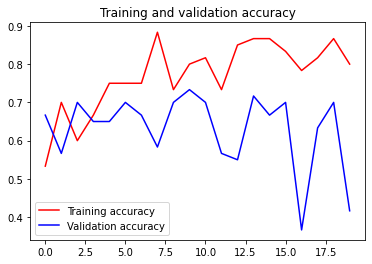

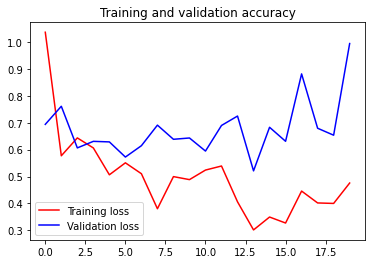

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.title('Training and validation accuracy')

plt.show()

In [20]:
# Adam
def build_model2():
    base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
    output = layers.GlobalAveragePooling2D()(base_model.output)
    # av1 = layers.Flatten()(base_model.output)
    fc1 = layers.Dense(128,activation='relu')(output)
    d1 = layers.Dropout(0.55)(fc1)
    output = layers.Dense(2, activation='softmax')(d1)
    model = Model(base_model.input, output)

    for layer in base_model.layers[:-4]:
        layer.trainable=False

    optimizer = tf.keras.optimizers.Adam(0.0003)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [21]:
model=build_model2()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [22]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              
                              validation_data = validation_generator,
                              validation_steps=6,)

C:\Users\anupa\AppData\Local\Temp\ipykernel_23284\538237212.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
6/6 [==============================] - 8s 520ms/step - loss: 0.6867 - accuracy: 0.5667 - val_loss: 0.6379 - val_accuracy: 0.6500
Epoch 2/20
6/6 [==============================] - 2s 267ms/step - loss: 0.7295 - accuracy: 0.6000 - val_loss: 0.6377 - val_accuracy: 0.6333
Epoch 3/20
6/6 [==============================] - 2s 344ms/step - loss: 0.5579 - accuracy: 0.7000 - val_loss: 0.6305 - val_accuracy: 0.6500
Epoch 4/20
6/6 [==============================] - 2s 273ms/step - loss: 0.5508 - accuracy: 0.7667 - val_loss: 0.6145 - val_accuracy: 0.6833
Epoch 5/20
6/6 [==============================] - 2s 263ms/step - loss: 0.3911 - accuracy: 0.8333 - val_loss: 0.6419 - val_accuracy: 0.6167
Epoch 6/20
6/6 [==============================] - 2s 271ms/step - loss: 0.4190 - accuracy: 0.8167 - val_loss: 0.6081 - val_accuracy: 0.6667
Epoch 7/20
6/6 [==============================] - 2s 268ms/step - loss: 0.3531 - accuracy: 0.8333 - val_loss: 0.5957 - val_accuracy: 0.6833
Epoch 8/20
6/6 [====

In [23]:
# Adam
def build_model3():
    base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
    output = layers.GlobalAveragePooling2D()(base_model.output)
    # av1 = layers.Flatten()(base_model.output)
    fc1 = layers.Dense(128,activation='relu')(output)
    d1 = layers.Dropout(0.55)(fc1)
    output = layers.Dense(2, activation='softmax')(d1)
    model = Model(base_model.input, output)

    for layer in base_model.layers[:-4]:
        layer.trainable=False

    optimizer = tf.keras.optimizers.SGD(0.001)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [24]:
model=build_model3()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=6,)

C:\Users\anupa\AppData\Local\Temp\ipykernel_23284\538237212.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
6/6 [==============================] - 9s 731ms/step - loss: 0.6537 - accuracy: 0.7000 - val_loss: 0.6189 - val_accuracy: 0.7000
Epoch 2/20
6/6 [==============================] - 2s 275ms/step - loss: 0.7848 - accuracy: 0.5667 - val_loss: 0.6438 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 2s 306ms/step - loss: 0.6720 - accuracy: 0.5667 - val_loss: 0.6182 - val_accuracy: 0.7000
Epoch 4/20
6/6 [==============================] - 2s 284ms/step - loss: 0.8451 - accuracy: 0.5500 - val_loss: 0.6179 - val_accuracy: 0.7000
Epoch 5/20
6/6 [==============================] - 2s 291ms/step - loss: 0.6646 - accuracy: 0.7167 - val_loss: 0.6428 - val_accuracy: 0.7000
Epoch 6/20
6/6 [==============================] - 2s 283ms/step - loss: 0.7841 - accuracy: 0.4833 - val_loss: 0.6786 - val_accuracy: 0.6000
Epoch 7/20
6/6 [==============================] - 2s 278ms/step - loss: 0.7457 - accuracy: 0.5500 - val_loss: 0.6735 - val_accuracy: 0.6500
Epoch 8/20
6/6 [====